In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [2]:
credito = pd.read_csv('Credit3.csv', sep=';')
credito.head()

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [3]:
credito.groupby(['class'])['class'].count()

class
0    300
1    700
Name: class, dtype: int64

In [4]:
credito['class'].value_counts()

class
1    700
0    300
Name: count, dtype: int64

In [5]:
previsores = credito.iloc[:,1:10].values
classe = credito.iloc[:,10].values
previsores

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      shape=(1000, 9), dtype=object)

In [6]:
classe

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,

## Label Encoders e Split test train

In [7]:
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])

In [8]:
previsores

array([[1, 1, 6, ..., 67, 2, 1],
       [0, 3, 48, ..., 22, 1, 1],
       [3, 1, 12, ..., 49, 1, 2],
       ...,
       [3, 3, 12, ..., 38, 1, 1],
       [1, 3, 45, ..., 23, 1, 1],
       [0, 1, 45, ..., 27, 1, 1]], shape=(1000, 9), dtype=object)

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, test_size=0.3, random_state=123)

## Começamos o treinamento com random forest e seguimos para a análise

In [10]:
modelo_rf = RandomForestClassifier(n_estimators=100)
modelo_rf.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [11]:
previsores_rf = modelo_rf.predict(X_teste)

In [12]:
matriz_confusao = confusion_matrix(y_teste, previsores_rf)
matriz_confusao

array([[ 43,  57],
       [ 17, 183]])

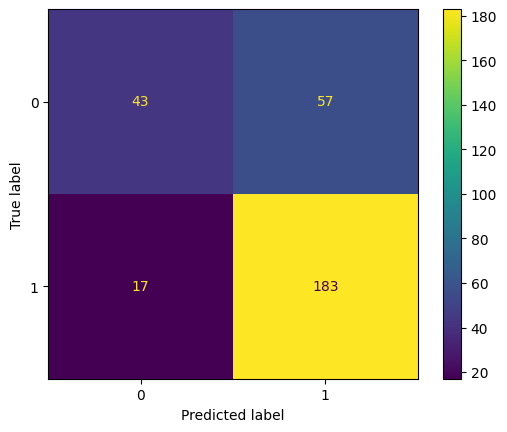

In [13]:
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
disp.plot()
plt.show()

In [14]:
# Acurácia
acuracia = accuracy_score(y_teste, previsores_rf)
acuracia

0.7533333333333333

In [15]:
erro = 1 - acuracia
erro

0.2466666666666667

In [22]:
# Quantos positivos verdadeiros temos
recall = recall_score(y_teste, previsores_rf)
recall

0.915

In [24]:
# quantos positivos foram marcados como positivos
precision = precision_score(y_teste, previsores_rf)
precision

0.7625

In [18]:
# 
f1 = f1_score(y_teste, previsores_rf)
f1

0.8318181818181818

In [42]:
# 
auc = roc_auc_score(y_teste, previsores_rf)
print(auc)

0.6725000000000001


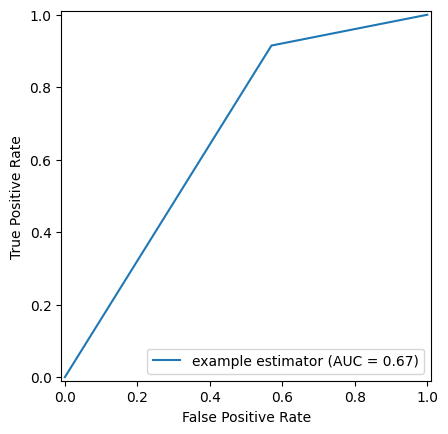

In [55]:
#algo errado aqui
fpr, tpr, thresholds = roc_curve(y_teste, previsores_rf)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc,
                                  estimator_name='example estimator')
display.plot()

In [25]:
log = log_loss(y_teste, previsores_rf)
log

8.890767835982231